# Lab 6.1: Subset Selection Method
## 1. Best Subset Selection

In [1]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load data
df = pd.read_csv('./datasets/Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


The Salary feature contains several null records. These are dropped.

In [4]:
# drop null
df = df.dropna(axis=0)

df.shape

(263, 21)

In [5]:
df.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [6]:
# Create dummies to handle categorical features
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'])
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# isolate target variable
X = df[df.columns.difference(['Salary'])]
y = df['Salary']

In [8]:
# create a function to perform best subset selection
def fitSubset(selected_features):
    model = sm.OLS(y,X[list(selected_features)])
    reg = model.fit()
    rss = ((reg.predict(X[list(selected_features)]) - y)**2).sum()
    return {'model':reg,'RSS':rss}

In [9]:
# iterate through all possible subsets
def BestSubsetSelection(k):
    results = []
    
    for feat in itertools.combinations(X.columns,k):
        # fit and compute metric
        results.append(fitSubset(feat))
        
    # summarize the data
    models = pd.DataFrame(results)
    
    # identify best model based on RSS
    best_model = models.loc[models['RSS'].idxmin()]
    
    return best_model

In [10]:
# iterate over k to find best model overall
k = 9
models = pd.DataFrame(columns=["RSS", "model"])

for i in range(1,k):
    models.loc[i] = BestSubsetSelection(i)

In [11]:
# display results
models

,RSS,model
1,4.321393e+07,<statsmodels.regression.linear_model.Regressio...
2,3.073305e+07,<statsmodels.regression.linear_model.Regressio...
3,2.941071e+07,<statsmodels.regression.linear_model.Regressio...
4,2.797678e+07,<statsmodels.regression.linear_model.Regressio...
5,2.717538e+07,<statsmodels.regression.linear_model.Regressio...
6,2.621956e+07,<statsmodels.regression.linear_model.Regressio...
7,2.593618e+07,<statsmodels.regression.linear_model.Regressio...
8,2.514098e+07,<statsmodels.regression.linear_model.Regressio...


In [12]:
# print best model with two features
print(models.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     416.7
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           5.80e-82
Time:                        18:32:05   Log-Likelihood:                -1907.6
No. Observations:                 263   AIC:                             3819.
Df Residuals:                     261   BIC:                             3826.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRBI           0.6788      0.066     10.295      0.0

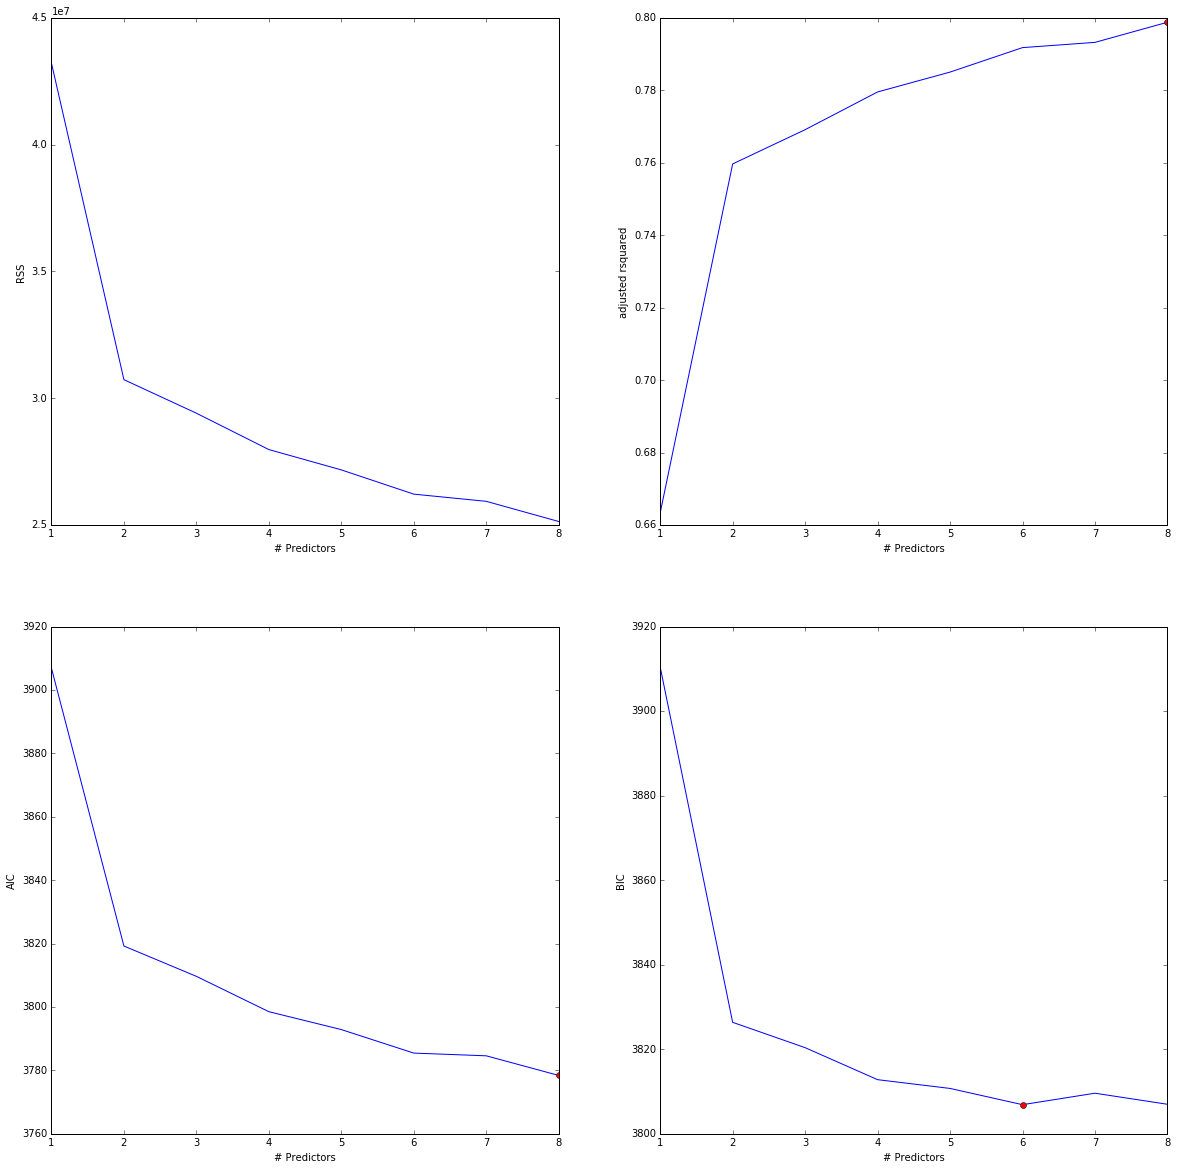

In [13]:
# plot results
plt.figure(figsize=(20,20))

# 2x2 grid
plt.subplot(2,2,1)

# plot RSS
plt.plot(models['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# plot R2
plt.subplot(2,2,2)
rsquared_adj = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.idxmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# plot AIC
plt.subplot(2, 2, 3)
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.plot(aic)
plt.plot(aic.idxmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# plot BIC
plt.subplot(2, 2, 4)
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.plot(bic)
plt.plot(bic.idxmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC');

## 2. Forward and Backward Stepwise Selection
### 2.1. Forward Stepwise Selection

In [14]:
def fitSubset_v2(X,selected_features):
    model = sm.OLS(y,X[list(selected_features)])
    reg = model.fit()
    rss = ((reg.predict(X[list(selected_features)]) - y)**2).sum()
    return {'model':reg,'RSS':rss}

In [15]:
def ForwardSelection(X):
    """
    Return the best models using forward selection
    """
    # store the used predictots
    predictors = []
    best_models = pd.DataFrame(columns=['RSS','model'])
    
    for i in range(1,len(X.columns)):
        # identify candidates
        remainings = [col for col in X.columns if col not in predictors]
        
        # store results
        results = []
        
        for pred in remainings:
            results.append(fitSubset_v2(X,predictors+[pred]))
        
            # convert list to DF
            models = pd.DataFrame(results)
        
        # extract best model based on selected metric
        best_model = models.loc[models['RSS'].idxmin()]
        best_models.loc[i] = best_model
        
        predictors = best_model['model'].model.exog_names
    return best_models

In [16]:
models2 = ForwardSelection(X)

In [17]:
print(models.loc[6, "model"].summary())
print(models2.loc[6, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           7.51e-86
Time:                        18:32:06   Log-Likelihood:                -1886.7
No. Observations:                 263   AIC:                             3785.
Df Residuals:                     257   BIC:                             3807.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AtBat         -1.9982      0.456     -4.383      0.0

### 2.2. Backward Stepwise Selection

In [18]:
def BackwarSelection(X):
    """
    Return the best models using backward selection
    """
    # store the used predictots
    predictors = [X.columns]
    best_models = pd.DataFrame(columns=['RSS','model'])
    
    while len(predictors)>1:
        # store results
        results = []
        
        for preds in itertools.combinations(predictors, len(predictors)-1):
            results.append(fitSubset_v2(X,preds))
        
            # convert list to DF
            models = pd.DataFrame(results)
        
        # extract best model based on selected metric
        best_model = models.loc[models['RSS'].idxmin()]
        best_models.loc[i] = best_model
        
        predictors = best_model['model'].model.exog_names
    return best_models

In [19]:
models3 = ForwardSelection(X)

In [20]:
print(models.loc[6, "model"].summary())
print(models2.loc[6, "model"].summary())
print(models3.loc[6, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     167.7
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           7.51e-86
Time:                        18:32:07   Log-Likelihood:                -1886.7
No. Observations:                 263   AIC:                             3785.
Df Residuals:                     257   BIC:                             3807.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AtBat         -1.9982      0.456     -4.383      0.0